# Segmentation

Ordre des choses à faire : 

- Séparer en lignes
- Séparer chaque ligne en mots 
- Séparer chaque mot en caractères 


https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

## Séparer en lignes (RLSA)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import rlsa

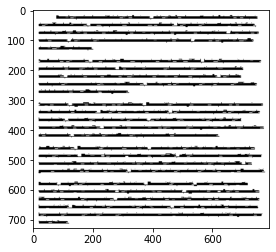

In [4]:
# Import de l'image et binarisation 

image = cv2.imread('image_texte_chatgpt.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# function call
image_rlsa_horizontal = rlsa.rlsa(image_binary, True, False, 10)
#print(type(image_rlsa_horizontal))

plt.figure()
plt.imshow(image_rlsa_horizontal, cmap=plt.cm.gray)
plt.show()

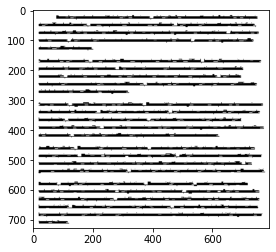

In [5]:
plt.figure()
plt.imshow(image_binary, cmap=plt.cm.gray)
plt.show()

In [6]:
print(image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [7]:
print(gray)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [8]:
print(image_rlsa_horizontal)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


Pour l'image de base chaque case est est un RGB

In [9]:
print(len(image_binary))

728


In [10]:
def il_y_a_que_du_blanc(i_precedent, i) :
    """
    Prend en entrée deux indices de lignes de l'image binaire
    Renvoie True si il n'y a que des lignes considérées comme blanches entre ces 2 indices, False sinon

    """
    return [1 for elt in range(i_precedent, i) if sum(image_binary[elt])/len(image_binary[elt]) >= 0.95] == [1]*len(range(i_precedent,i))

In [11]:
# Blanc : 255
# Noir : 0

# Test de séparation des lignes sur l'image en binary : 

# Idée : dès qu'on repère une ligne avec plus de 95% de blanc (255) on prend l'indicce, on prendra ensuite l'indice de ligne de la ligne avec plus de 95% de blanc suivante, ce qui nous donne une ligne 

taux = 0
dico_des_lignes = {}

for i in range(len(image_binary)) : 
    ligne_pixel = image_binary[i]
    taux = sum(ligne_pixel)/len(ligne_pixel)
    dico_des_lignes[f"ligne_pixel_{i}"] = []
    i_precedent = i
    if taux >= 0.95 : 
        if il_y_a_que_du_blanc(i_precedent, i) == False :
            dico_des_lignes[f"ligne_pixel_{i_precedent}"].append(i)

# Vider le dictionnaire de toutes les entrées vides 
dico_des_lignes_pas_vides = {}

for elt in dico_des_lignes.keys() :
    if dico_des_lignes[elt] != [] :
        dico_des_lignes_pas_vides[elt] = dico_des_lignes[elt]

print(dico_des_lignes_pas_vides)

# Test d'affichage
for elt in dico_des_lignes_pas_vides.keys() :
    print(elt, dico_des_lignes_pas_vides[elt])



# NE MARCHE PAS, PAS LA BONNE IDEE A IMPLEMENTER

{}


In [12]:
print(image_binary[189])

somme = 0
for j in image_binary[189] :
    if j == 255 : 
        somme += 1
    else : 
        somme += 0
taux = somme/len(image_binary[146])
print(taux)

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255   0   0 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255   0   0 255 25

In [13]:
liste_indices_pixels_blancs = []
liste_indices_pixels_noirs = []

for i in range(len(image_binary)) :
    ligne_pixel = image_binary[i]
    somme = 0
    for j in image_binary[i] :
        if j == 255 : 
            somme += 1
        else : 
            somme += 0
    taux_de_blancs = somme/len(image_binary[i])
    if taux_de_blancs >= 0.98 : #Quasi que des blancs
        liste_indices_pixels_blancs.append(i)
    else : 
        liste_indices_pixels_noirs.append(i)

print(liste_indices_pixels_blancs)
print(liste_indices_pixels_noirs)


# Séparer les listes
indices_lignes = []
for i in range(1, len(liste_indices_pixels_blancs)) :
    if liste_indices_pixels_blancs[i] != liste_indices_pixels_blancs[i-1]+1 :
        indices_lignes.append((liste_indices_pixels_blancs[i-1], liste_indices_pixels_blancs[i]))
print(indices_lignes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 371, 372, 373, 374,

In [14]:
print(len(indices_lignes))

25


In [15]:
"""
for t in indices_lignes :   
    plt.figure()
    plt.imshow(image[t[0]:t[1]])
    plt.show()
"""

'\nfor t in indices_lignes :   \n    plt.figure()\n    plt.imshow(image[t[0]:t[1]])\n    plt.show()\n'

## Encapsulation du code fonctionnel pour la séparation en ligne

In [16]:
def separe_en_lignes(image : np, taux=0.98) -> list :
 
    """ 
    Description : Calcule le taux de pixels blancs présents sur chaque ligne de pixels. 
                  Sépare ensuite  les lignes de pixels en fonction de leur taux. 
                  On regarde dans la liste des indices des pixels blancs et si on observe un 'saut', c'est que des lignes de pixels de texte sont là
                  On stocke donc ces indices, qui correspondent aux indices des lignes de pixel contenant du texte

    Exemple : >>> exemple = separe_en_lignes(image)
                  exemple = [ (0, 21), (25, 65), ...]

    Input : (image) : une image binarisée en numpy
            (taux) : un float entre 0 et 1 représentant le nombre de pixels blancs / le nombre de pixels total de la ligne. De base sur 0.98

    Output : (indices_lignes) : une liste de tuples, chaque tuple les coordonées y de début et de fin de chaque ligne

    """
    # Listes contenant les indices y des lignes de pixels noirs et blanches (en fonction de leurs taux)
    liste_indices_pixels_blancs = []
    liste_indices_pixels_noirs = []

    for i in range(len(image_binary)) :
        ligne_pixel = image_binary[i]
        # Calcul du nombre de pixels blancs dans une ligne
        somme = 0
        for j in image_binary[i] :
            if j == 255 : 
                somme += 1
            else : 
                somme += 0
        # Calcul du taux de pixels blancs dans la ligne
        taux_de_blancs = somme/len(ligne_pixel)
        # Si le taux est > a un certain nombre (0.98 de base) on considère que cette ligne ne contient pas de texte
        if taux_de_blancs >= 0.98 : #Quasi que des blancs
            liste_indices_pixels_blancs.append(i)
        else : 
            liste_indices_pixels_noirs.append(i)

    # On regarde dans la liste des indices des pixels blancs et si on observe un 'saut', c'est que des lignes de pixels de texte sont là
    # On stocke donc ces indices, qui correspondent aux indices des lignes de pixel contenant du texte
    indices_lignes = []
    for i in range(1, len(liste_indices_pixels_blancs)) :
        if liste_indices_pixels_blancs[i] != liste_indices_pixels_blancs[i-1]+1 :
            indices_lignes.append((liste_indices_pixels_blancs[i-1], liste_indices_pixels_blancs[i]))
    
    return indices_lignes

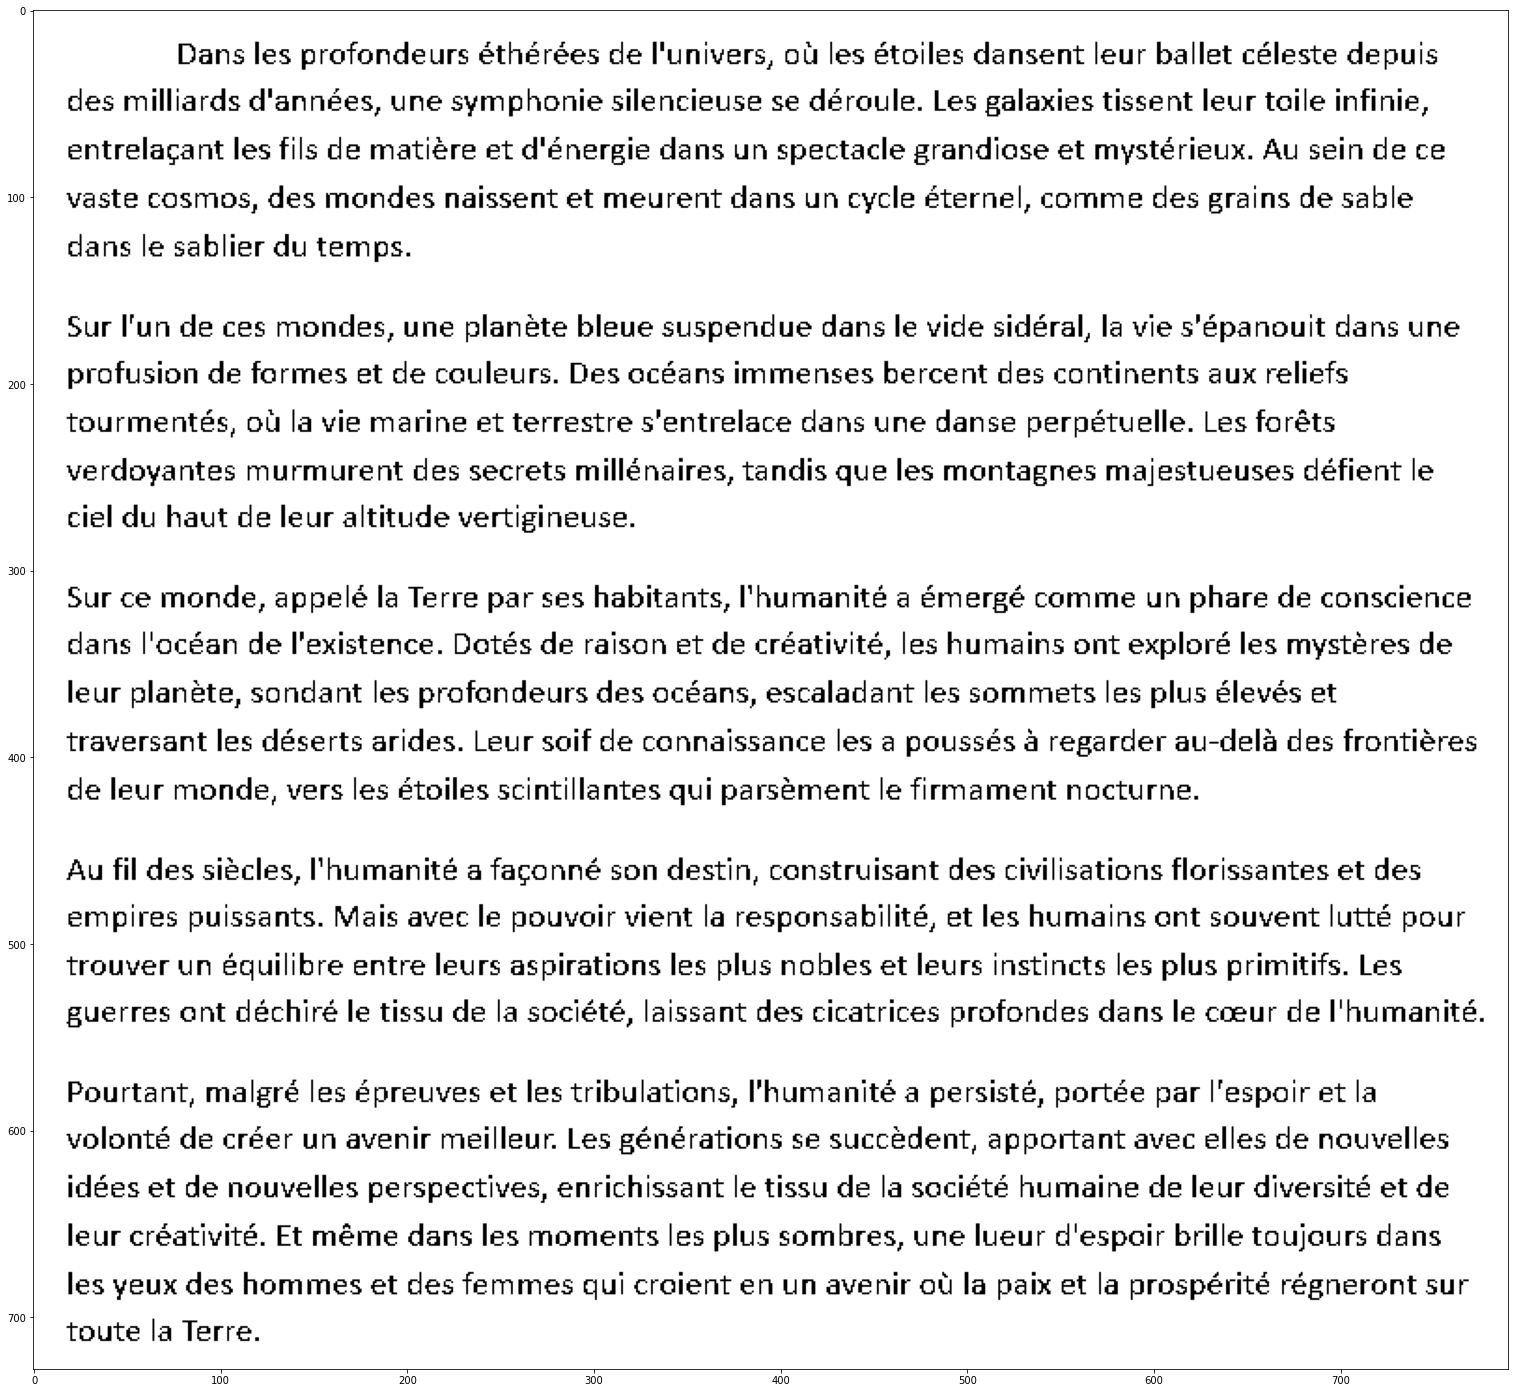

Indices y de début de fin pour chaque ligne : [(16, 29), (41, 54), (67, 80), (81, 83), (93, 106), (123, 132), (162, 175), (187, 200), (213, 226), (239, 252), (264, 277), (307, 320), (332, 345), (358, 371), (384, 397), (410, 423), (453, 466), (478, 491), (504, 517), (529, 542), (572, 586), (586, 588), (597, 610), (623, 636), (649, 662), (675, 688), (704, 713)]


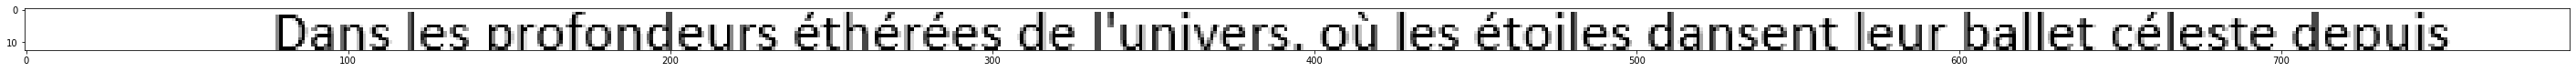

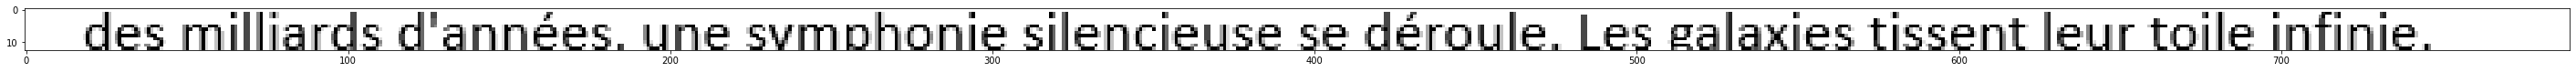

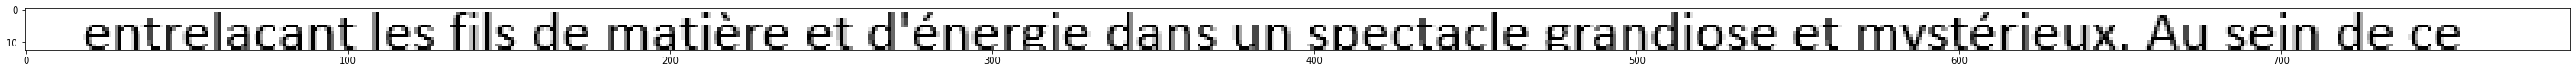

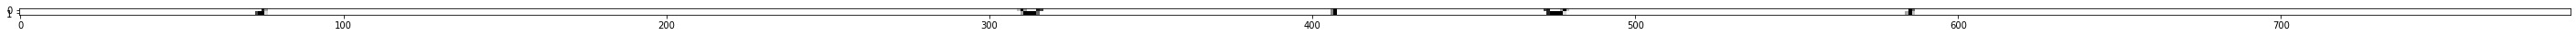

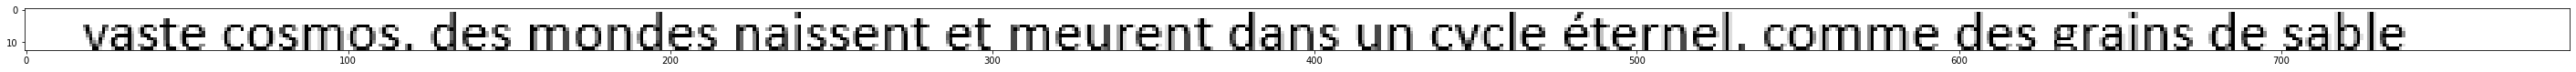

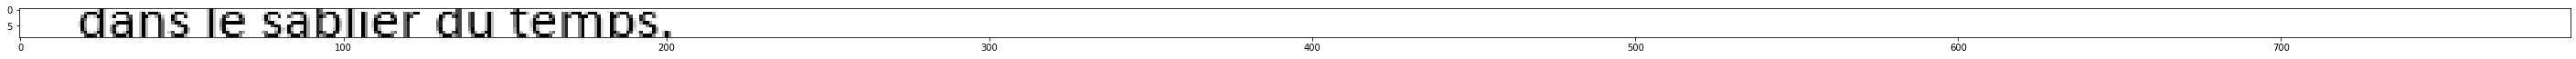

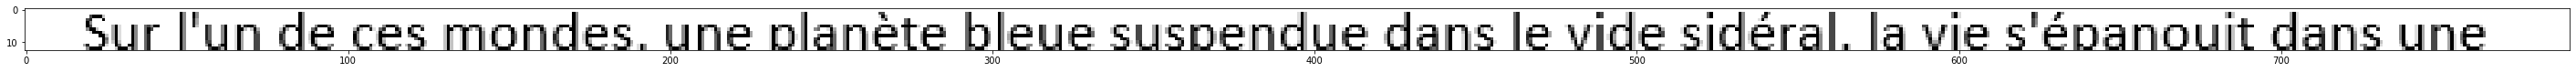

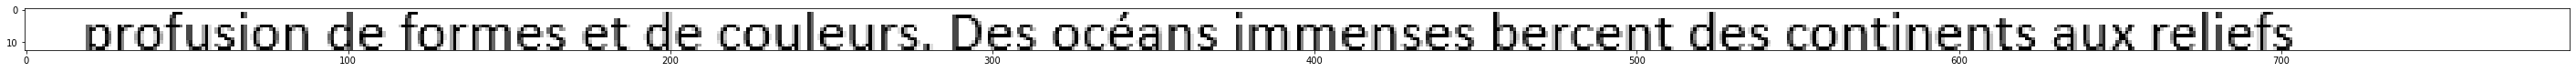

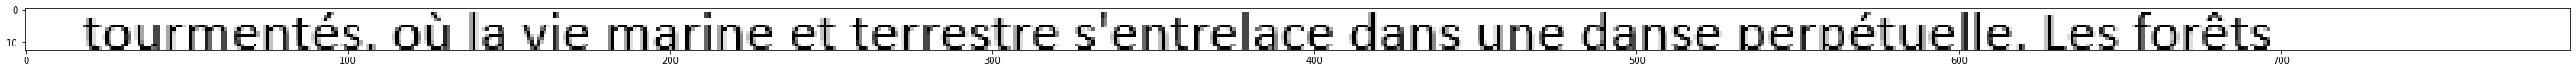

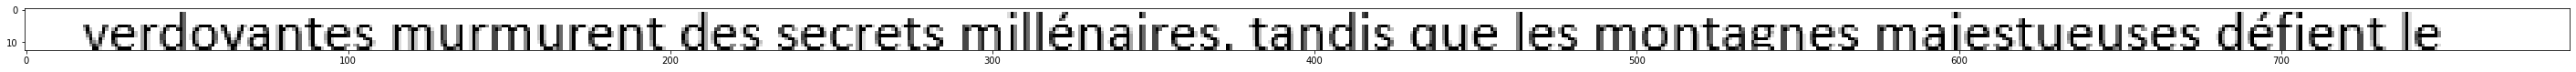

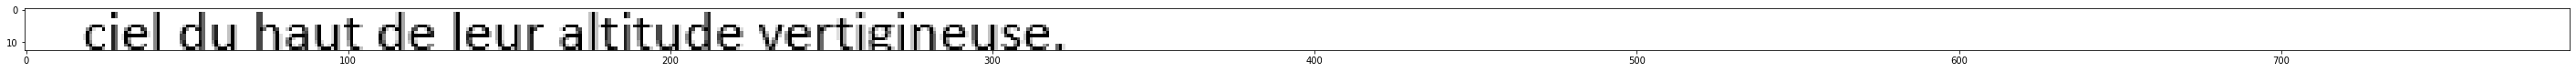

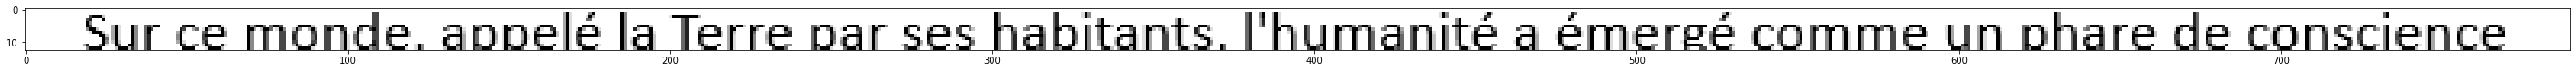

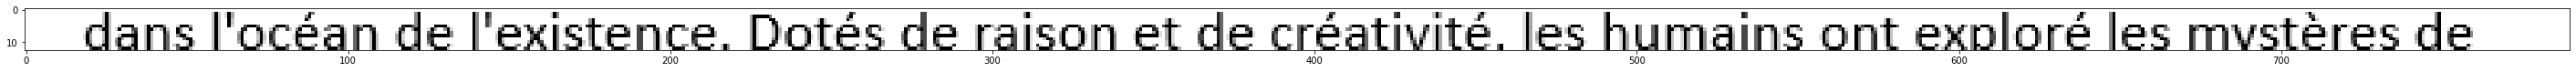

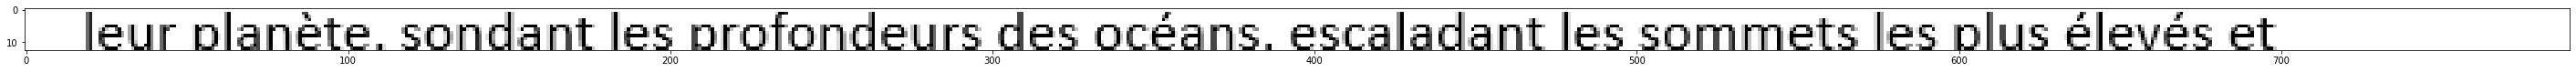

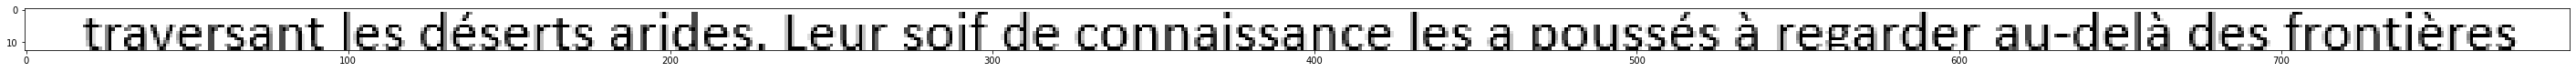

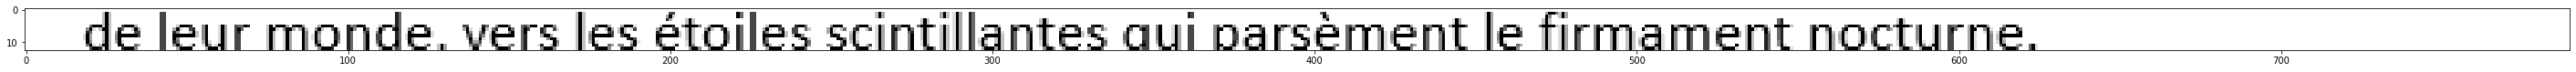

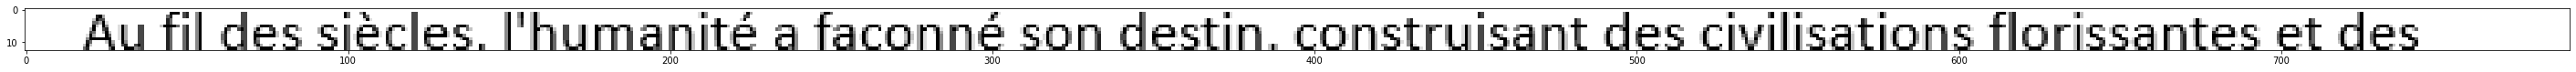

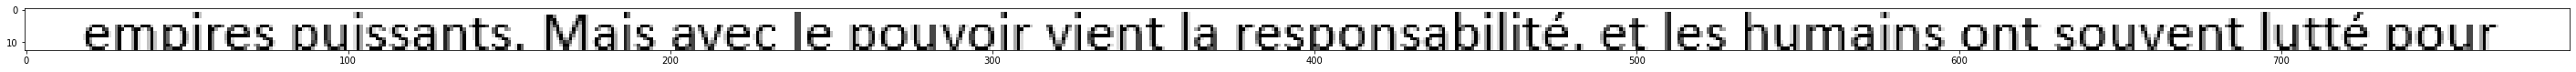

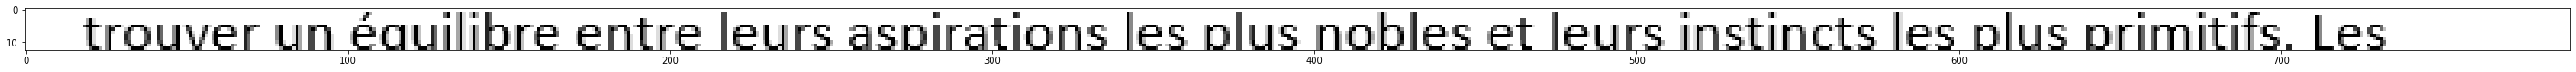

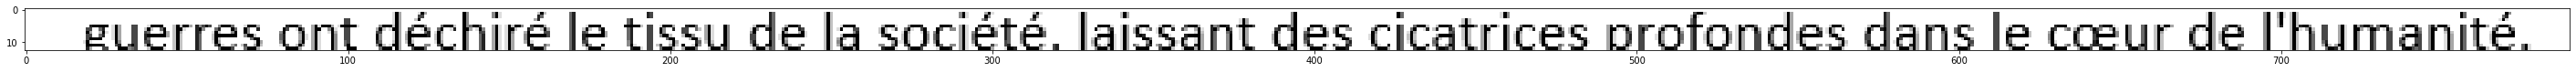

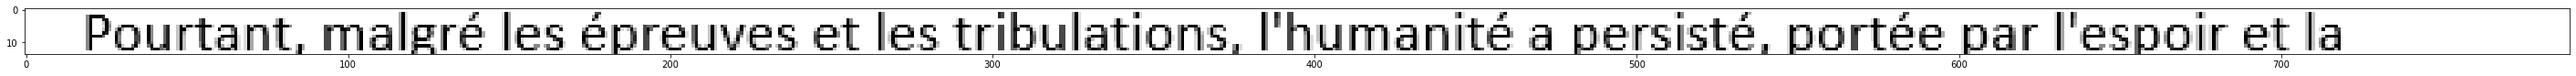

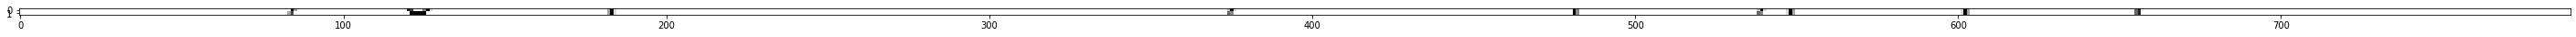

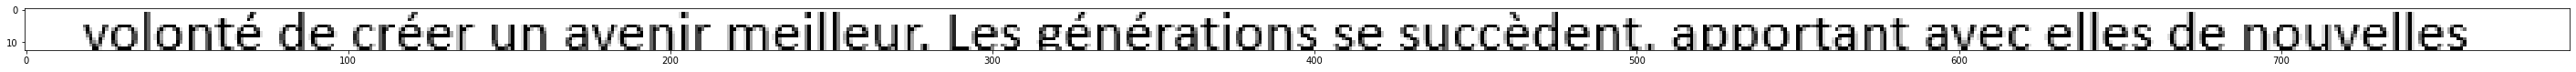

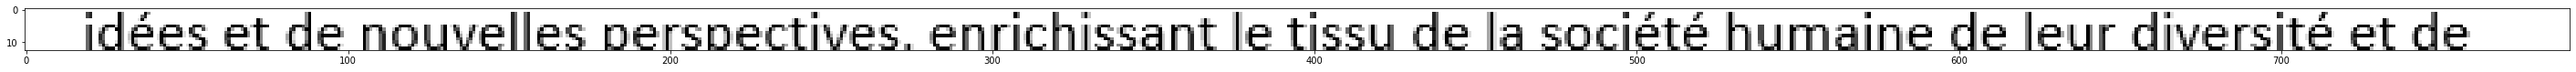

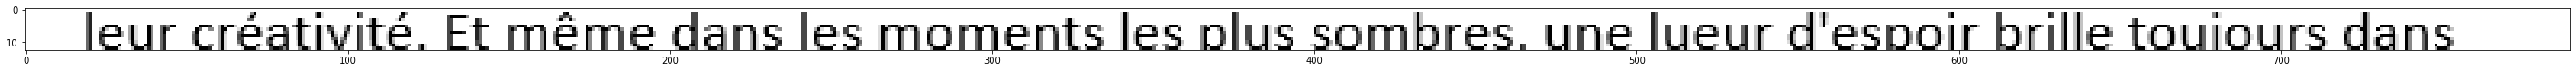

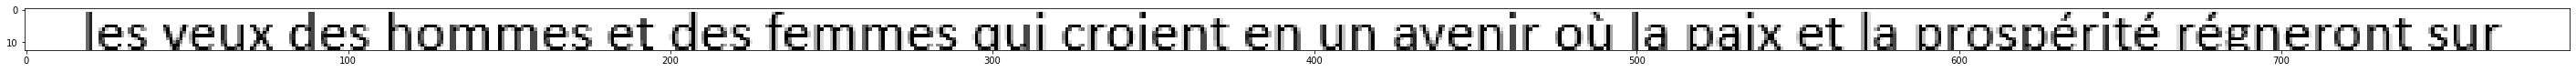

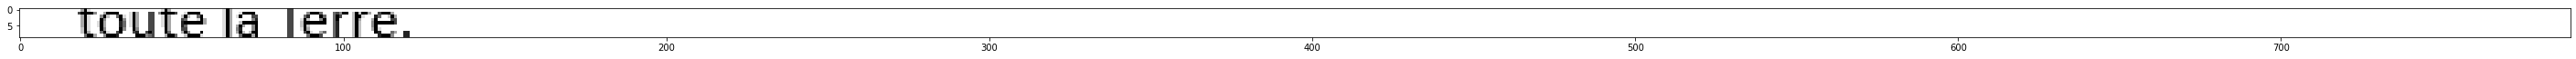

In [19]:
# TEST 

image = cv2.imread('image_texte_chatgpt.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.figure(figsize=(50,25))
plt.imshow(image_binary, cmap=plt.cm.gray)
plt.show()

indices_lignes = separe_en_lignes(image_binary)
print("Indices y de début de fin pour chaque ligne :", indices_lignes)

for t in indices_lignes :   
    plt.figure(figsize=(50,25))
    plt.imshow(image[t[0]:t[1]])
    plt.show()

## Séparer les mots

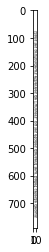

In [20]:
# Rotate une image

t = indices_lignes[0]

new = image[t[0]:t[1]]

new = cv2.transpose(new)

plt.figure()
plt.imshow(new)
plt.show()

# J'ai l'impression qu'on perd de la netteté
# Je vais partir différement

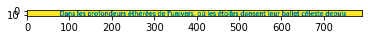

In [21]:
t = indices_lignes[0]

im = image_binary[t[0]:t[1]]

plt.figure()
plt.imshow(im)
plt.show()

In [37]:
# Parcourir dans le sens de la heuteur 
# Réussir à séparer les différents mots d'une ligne 

In [22]:
print(len(im))
print(len(im[10]))

13
790


In [23]:
# Prérequis : les coordonées d'une ligne de texte (quelques lignes de pixels)

liste = [0]*len(im[0])
for i in range(len(im)) :
    y = im[i]
    for j in range(len(y)) :
        x = y[j]
        
        if x == 255 :
            liste[j] += 1
liste_taux = [elt/len(im) for elt in liste]
print(liste_taux)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.15384615384615385, 0.15384615384615385, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.7692307692307693, 0.5384615384615384, 0.46153846153846156, 1.0, 1.0, 0.6923076923076923, 0.46153846153846156, 0.7692307692307693, 0.7692307692307693, 0.6923076923076923, 0.38461538461538464, 0.5384615384615384, 1.0, 1.0, 0.38461538461538464, 0.38461538461538464, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.8461538461538461, 0.46153846153846156, 1.0, 1.0, 0.9230769230769231, 0.6153846153846154, 0.7692307692307693, 0.6923076923076923, 0.6923076923076923, 0.692307692

In [24]:
l = []
for e in liste_taux :
    if e != 1.0 :
        l.append(e)
print(max(l))
    

0.9230769230769231


In [25]:
taux_fixe = 0.98
liste_indices_colones_blanches = []
liste_indices_colones_noires = []

for i in range(len(liste_taux)) :
    taux_colone = liste_taux[i]
    if taux_colone > taux_fixe :
        liste_indices_colones_blanches.append(i)
    else :
        liste_indices_colones_noires.append(i)

print(liste_indices_colones_blanches)
print(liste_indices_colones_noires)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 87, 88, 96, 97, 105, 106, 113, 114, 115, 116, 117, 118, 121, 122, 130, 131, 138, 139, 140, 141, 142, 143, 151, 152, 153, 158, 167, 182, 183, 191, 192, 201, 202, 210, 211, 212, 220, 221, 227, 233, 234, 235, 236, 237, 238, 247, 253, 254, 262, 263, 271, 272, 273, 278, 287, 296, 303, 304, 305, 306, 307, 308, 316, 317, 326, 327, 328, 329, 330, 331, 334, 335, 338, 339, 347, 348, 349, 357, 358, 359, 361, 362, 370, 371, 379, 380, 386, 392, 393, 394, 396, 397, 398, 399, 400, 401, 402, 410, 411, 412, 420, 421, 422, 423, 424, 425, 426, 428, 429, 438, 445, 446, 447, 448, 449, 450, 458, 464, 465, 474, 475, 477, 478, 479, 482, 483, 491, 492, 498, 499, 500, 501, 502, 503, 512, 513, 520, 521, 522, 530, 5

In [26]:
indices_colonnes = []
for i in range(1, len(liste_indices_colones_blanches)) :
    if liste_indices_colones_blanches[i] != liste_indices_colones_blanches[i-1]+1 :
         indices_colonnes.append((liste_indices_colones_blanches[i-1], liste_indices_colones_blanches[i]))

print(indices_colonnes)

[(77, 87), (88, 96), (97, 105), (106, 113), (118, 121), (122, 130), (131, 138), (143, 151), (153, 158), (158, 167), (167, 182), (183, 191), (192, 201), (202, 210), (212, 220), (221, 227), (227, 233), (238, 247), (247, 253), (254, 262), (263, 271), (273, 278), (278, 287), (287, 296), (296, 303), (308, 316), (317, 326), (331, 334), (335, 338), (339, 347), (349, 357), (359, 361), (362, 370), (371, 379), (380, 386), (386, 392), (394, 396), (402, 410), (412, 420), (426, 428), (429, 438), (438, 445), (450, 458), (458, 464), (465, 474), (475, 477), (479, 482), (483, 491), (492, 498), (503, 512), (513, 520), (522, 530), (531, 538), (538, 547), (548, 556), (556, 563), (568, 570), (571, 580), (581, 589), (591, 596), (601, 610), (610, 618), (620, 622), (624, 627), (628, 636), (636, 642), (647, 654), (655, 663), (664, 667), (668, 676), (677, 690), (690, 698), (703, 712), (713, 721), (723, 731), (732, 740), (742, 744), (745, 752)]


In [27]:
print(len(im))

13


(77, 87) 77 87


C:\Users\Hugo Noel\AppData\Local\Temp/ipykernel_20764/1798426639.py:6: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(plop)


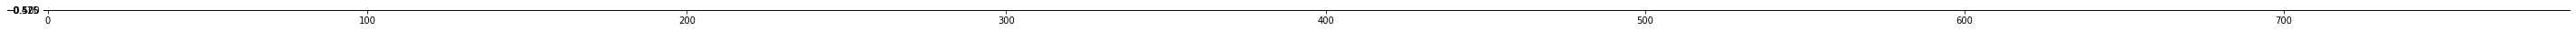

In [32]:
t = indices_colonnes[0]
print(t, t[0], t[1])
plop = im[0:][t[0]:t[1]]

plt.figure(figsize=(50,10))
plt.imshow(plop)
plt.show()